Background

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

Objectives

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

problems

come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

 

Key Questions
- ///
- ///
- ///

Data Description

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

Data Dictionary

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
- Price: The price of the used car in INR Lakhs

import necessary libraries

In [125]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [126]:
ucdata=pd.read_csv('used_cars_data.csv')

#pd.seed(1)
ucdata.sample(n=10, random_state=1)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


shape, dtypes, describe, info, etc

In [127]:
ucdata.shape

(7253, 14)

In [128]:
ucdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [129]:
ucdata.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

In [130]:
#ucdata.describe(include='all').T
ucdata.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.0,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


In [131]:
car_columns = ucdata.select_dtypes(exclude=np.number).columns
car_columns

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price'],
      dtype='object')

In [132]:
# we will skip the title and description columns as they will have a lot of unique values
car_col = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price']

# printing the number of occurrences of each unique value in each categorical column
for column in car_col:
    print(ucdata[column].value_counts())
    print("-" * 50)

Mahindra XUV500 W8 2WD                    55
Maruti Swift VDI                          49
Maruti Swift Dzire VDI                    42
Honda City 1.5 S MT                       39
Maruti Swift VDI BSIV                     37
                                          ..
Tata Safari Storme VX                      1
Maruti Baleno Vxi                          1
BMW X3 xDrive20d Expedition                1
Mercedes-Benz GLS 350d Grand Edition       1
Mahindra TUV 300 2015-2019 mHAWK100 T8     1
Name: Name, Length: 2041, dtype: int64
--------------------------------------------------
Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
--------------------------------------------------
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
----------------------

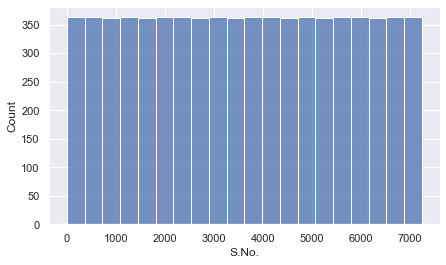

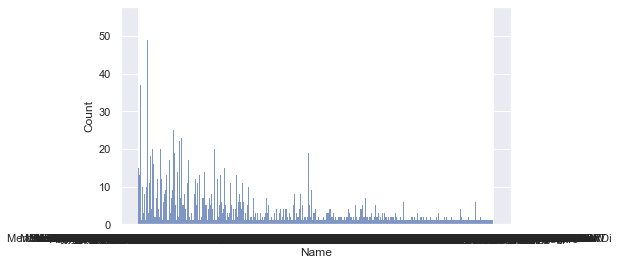

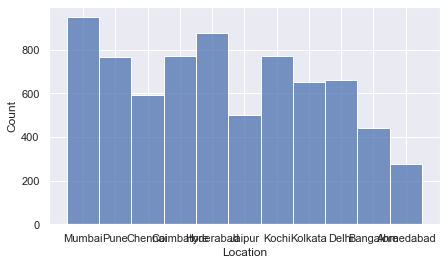

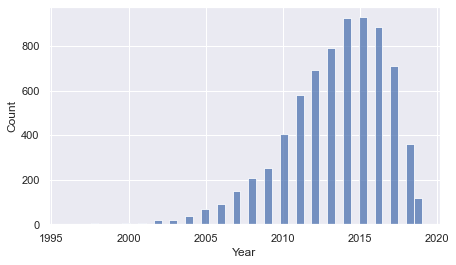

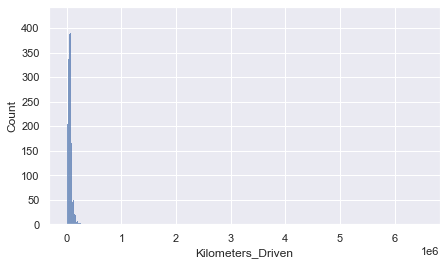

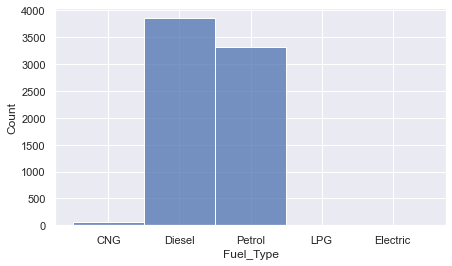

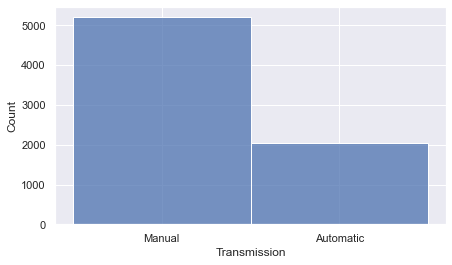

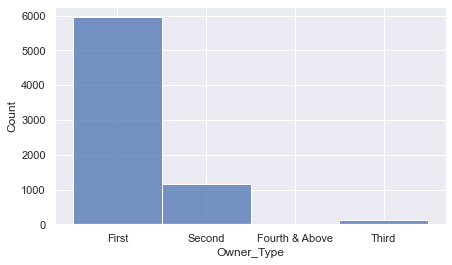

ConversionError: Failed to convert value(s) to axis units: 0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
7248    20.54 kmpl
7249    17.21 kmpl
7250    23.08 kmpl
7251     17.2 kmpl
7252     10.0 kmpl
Name: x, Length: 7253, dtype: object

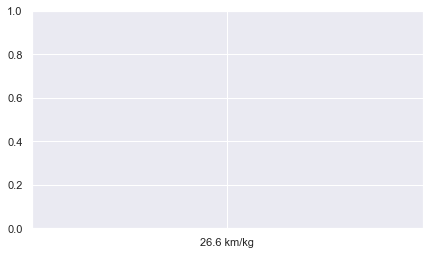

In [133]:
for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=i)
    plt.show()

In [ ]:
for i in df.columns:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(data=df, x=i, y="Engine")
    plt.show()

Data pre-processing -  Missing value Treatment - Outlier Treatment - Feature Engineering etc

In [ ]:
# simplify name. remove yrs, fuel type, seats, stick/make all in caps 


In [ ]:
#find missing name values where 'seats' is null 
ucdata.loc[ucdata['Engine'].isnull()]

In [ ]:
#impute missing values in seats and engine 
#for i,row in ucdata.iterrows():
    
    if ucdata.at[i,'Name']=='Audi A4 3.2 FSI Tiptronic Quattro':
        ucdata.at[i,'Seats']= 5
        
    elif ucdata.at[i,'Name']=='BMW 5 Series 520d Sedan':
        ucdata.at[i,'Seats']=5
          
    elif ucdata.at[i,'Name']=='Fiat Punto 1.2 Dynamic':
        ucdata.at[i,'Seats']=5
        
    elif ucdata.at[i,'Name']=='Fiat Punto 1.3 Emotion':
        ucdata.at[i,'Seats']=5
        
    elif ucdata.at[i,'Name']=='Fiat Punto 1.4 Emotion':
        ucdata.at[i,'Seats']=5
    
    elif ucdata.at[i,'Name']=='Ford Endeavour Hurricane LE':
        ucdata.at[i,'Seats']=7
        
    elif ucdata.at[i,'Name']=='Ford Figo Diesel':
        ucdata.at[i,'Seats']=5
        
    elif ucdata.at[i,'Name']=='Honda City 1.3 DX':
        ucdata.at[i,'Seats']=7
        
    elif ucdata.at[i,'Name']=='Honda City 1.5 EXI':
        ucdata.at[i,'Seats']=5
        
    elif ucdata.at[i,'Name']=='Honda City 1.5 GXI':
        ucdata.at[i,'Seats']=5
        
    elif ucdata.at[i,'Name']=='Honda CR-V AT With Sun Roof':
        ucdata.at[i,'Seats']=7
        
    elif ucdata.at[i,'Name']=='Honda Jazz 2020 Petrol':
        ucdata.at[i,'Seats']=5
        
    elif ucdata.at[i,'Name']=='Honda Jazz Select Edition':
        ucdata.at[i,'Seats']=5
        
    elif ucdata.at[i,'Name']=='Hyundai i20 new Sportz AT 1.4':
        ucdata.at[i,'Seats']=5
        
    elif ucdata.at[i,'Name']=='Hyundai Santro GLS II - Euro II':
        ucdata.at[i,'Seats']=5
        
    elif ucdata.at[i,'Name']=='Hyundai Santro LP zipPlus':
        ucdata.at[i,'Seats']=5
        
    elif ucdata.at[i,'Name']=='Hyundai Santro Xing XG':
        ucdata.at[i,'Seats']=5
        
    elif ucdata.at[i,'Name']=='Land Rover Range Rover 3.0 D':
        ucdata.at[i,'Seats']=5
        
    elif ucdata.at[i,'Name']=='Land Rover Range Rover Sport 2005 2012 Sport':
        ucdata.at[i,'Seats']=5
        
    elif ucdata.at[i,'Name']=='Mahindra TUV 300 P4':
        ucdata.at[i,'Seats']=9
        
    elif ucdata.at[i,'Name']=='Maruti Estilo LXI':
        ucdata.at[i,'Seats']=5
        
    elif ucdata.at[i,'Name']=='Maruti Swift 1.3 LXI':
        ucdata.at[i,'Seats']=5
        
    elif ucdata.at[i,'Name']=='Maruti Swift 1.3 VXi':
        ucdata.at[i,'Seats']=5
    
    elif ucdata.at[i,'Name']=='Maruti Swift 1.3 VXI ABS':
        ucdata.at[i,'Seats']=5
        
    elif ucdata.at[i,'Name']=='Maruti Swift 1.3 ZXI':
        ucdata.at[i,'Seats']=5
        
    elif ucdata.at[i,'Name']=='Maruti Wagon R Vx':
        ucdata.at[i,'Seats']=5
        
    elif ucdata.at[i,'Name']=='Skoda Laura 1.8 TSI Ambition':
        ucdata.at[i,'Seats']=5
        
    elif ucdata.at[i,'Name']=='Toyota Etios Liva Diesel TRD Sportivo':
        ucdata.at[i,'Seats']=5
        
    elif ucdata.at[i,'Name']=='Toyota Etios Liva V':
        ucdata.at[i,'Seats']=5
    

In [ ]:
ucdata.isnull().sum()

In [ ]:
#find median for price and new_price and insert median value

NewPrice_cols = []
for colname in df.columns[df.dtypes == 'object']:  # only need to consider string columns
    if df[colname].str.endswith('Lakh','Cr').any():  # using `.str` so I can use an element-wise string method
        NewPrice_cols.append(colname)
print(NewPrice_cols)

In [ ]:
#take out engine units
def engine_to_num(Engine):
    """In the weight column I'm replacing the terminal 'lbs' with
    the empty string and converting to a float. Non-strings are 
    np.nans and are kept as np.nans."""
    if isinstance(Engine, str):
        return float(Engine.replace('CC',''))
    else:
        return np.nan
    
ucdata['Engine'] = ucdata['Engine'].apply(engine_to_num)    

ucdata.sample()

In [ ]:
#take out power units
eg_num_col = ['Engine']

for col in eg_num_col:
    ucdata['Engine'].apply(lambda x: x.split('CC'))
#ucdata['Engine']=ucdata['Engine'].apply(lambda x: x.str.strip('CC'))

#drop cc 
engin_col=[]
def Engine_to_num(engine_val):
 
  if isinstance(engine_val, str):  # checks if 'ram_val' is a string
        if engine_val.endswith("CC"):
            return float(engine_val.replace("CC"," "))
        
for colname in engin_col:
    df[colname] = df[colname].apply(Engine_to_num)
    
ucdata.head()

In [ ]:
ucdata.head()

In [ ]:
#drop units - engine, power 
ucdata.drop(ucdata.columns[ucdata.columns.str.contains('CC')], axis=0)

In [ ]:
#fill NP with median 

missing_np=['New_Price']

for i in missing_np:
 ucdata.loc[ucdata.loc[:,i].isnull(),i] = ucdata.loc[:,i].median()

In [ ]:
#missing value treatment 
#insert power,seats,engine,mileage info from wiki



Exploratory Data Analysis -Uni/Biavariate - observations for each or whole 

Model building - Linear Regression

Model performance evaluation

Insights & Recommendations

*comments(VERY IMPORTANT)